In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# from sklearn.metrics.pairwise import pairwise_distances
# from joblib import parallel_backend



# to fix - need to try scaling dataß

In [2]:
df = pd.read_csv('data-p4/impootation.csv')
df

,Unnamed: 0,YEAR,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,DEP_DELAY,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_TIME_imp_1439,ARR_DELAY_imp,DEP_DELAY_imp,ARR_TIME_sch_1439,ARR_TIME_sch_military
0,0,2019,6,2019-01-19,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,-10.0,1832.0,-25.0,0.0,0.0,1112.0,-25.0,-10.0,1137.0,1857
1,1,2019,7,2019-01-20,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,-4.0,1825.0,-37.0,0.0,0.0,1105.0,-37.0,-4.0,1142.0,1902
2,2,2019,1,2019-01-21,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,-9.0,1845.0,-17.0,0.0,0.0,1125.0,-17.0,-9.0,1142.0,1902
3,3,2019,2,2019-01-22,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,-4.0,1839.0,-23.0,0.0,0.0,1119.0,-23.0,-4.0,1142.0,1902
4,4,2019,3,2019-01-23,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,-6.0,1850.0,-12.0,0.0,0.0,1130.0,-12.0,-6.0,1142.0,1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,583980,2019,3,2019-01-30,14057,1405702,34057,"Portland, OR",13930,1393007,...,-9.0,1225.0,-27.0,0.0,0.0,745.0,-27.0,-9.0,772.0,1252
583981,583981,2019,3,2019-01-30,13930,1393007,30977,"Chicago, IL",14908,1490803,...,35.0,2230.0,17.0,17.0,1.0,1350.0,17.0,35.0,1333.0,2213
583982,583982,2019,3,2019-01-30,14635,1463502,31714,"Fort Myers, FL",13930,1393007,...,132.0,2035.0,113.0,113.0,1.0,1235.0,113.0,132.0,1122.0,1842
583983,583983,2019,3,2019-01-30,11618,1161802,31703,"Newark, NJ",13930,1393007,...,32.0,841.0,37.0,37.0,1.0,521.0,37.0,32.0,484.0,804


In [9]:
def assign_weekend(day_of_week):
    if day_of_week <= 6:
        return "Weekend"
    else:
        return "Weekday"
    
df["weekend"] = df["DAY_OF_WEEK"].apply(assign_weekend)

In [10]:
def assign_cluster(arrival_time):
    if 0 <= arrival_time < 240:
        return "0:00 - 4:00"
    elif 240 <= arrival_time < 480:
        return "4:00 - 8:00"
    elif 480 <= arrival_time < 720:
        return "8:00 - 12:00"
    elif 720 <= arrival_time < 960:
        return "12:00 - 16:00"
    elif 960 <= arrival_time < 1200:
        return "16:00 - 20:00"
    else:
        return "20:00 - 0:00"

# Apply the function to create a new column
df["tod"] = df["ARR_TIME_sch_1439"].apply(assign_cluster)

In [14]:
df["Cluster"] = df["weekend"].astype(str) + " " + df["tod"].astype(str)
df

,Unnamed: 0,YEAR,DAY_OF_WEEK,FL_DATE,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,ARR_DELAY_NEW,ARR_DEL15,ARR_TIME_imp_1439,ARR_DELAY_imp,DEP_DELAY_imp,ARR_TIME_sch_1439,ARR_TIME_sch_military,tod,weekend,Cluster
0,0,2019,6,2019-01-19,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,0.0,0.0,1112.0,-25.0,-10.0,1137.0,1857,16:00 - 20:00,Weekend,Weekend 16:00 - 20:00
1,1,2019,7,2019-01-20,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,0.0,0.0,1105.0,-37.0,-4.0,1142.0,1902,16:00 - 20:00,Weekday,Weekday 16:00 - 20:00
2,2,2019,1,2019-01-21,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,0.0,0.0,1125.0,-17.0,-9.0,1142.0,1902,16:00 - 20:00,Weekend,Weekend 16:00 - 20:00
3,3,2019,2,2019-01-22,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,0.0,0.0,1119.0,-23.0,-4.0,1142.0,1902,16:00 - 20:00,Weekend,Weekend 16:00 - 20:00
4,4,2019,3,2019-01-23,13487,1348702,31650,"Minneapolis, MN",11193,1119302,...,0.0,0.0,1130.0,-12.0,-6.0,1142.0,1902,16:00 - 20:00,Weekend,Weekend 16:00 - 20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,583980,2019,3,2019-01-30,14057,1405702,34057,"Portland, OR",13930,1393007,...,0.0,0.0,745.0,-27.0,-9.0,772.0,1252,12:00 - 16:00,Weekend,Weekend 12:00 - 16:00
583981,583981,2019,3,2019-01-30,13930,1393007,30977,"Chicago, IL",14908,1490803,...,17.0,1.0,1350.0,17.0,35.0,1333.0,2213,20:00 - 0:00,Weekend,Weekend 20:00 - 0:00
583982,583982,2019,3,2019-01-30,14635,1463502,31714,"Fort Myers, FL",13930,1393007,...,113.0,1.0,1235.0,113.0,132.0,1122.0,1842,16:00 - 20:00,Weekend,Weekend 16:00 - 20:00
583983,583983,2019,3,2019-01-30,11618,1161802,31703,"Newark, NJ",13930,1393007,...,37.0,1.0,521.0,37.0,32.0,484.0,804,8:00 - 12:00,Weekend,Weekend 8:00 - 12:00


In [20]:
df.to_csv("data-p4/tod_and_weekend.csv")

In [16]:
delays = df.groupby(['DEST_AIRPORT_ID', 'ORIGIN_AIRPORT_ID','Cluster'])[['ARR_DELAY','DEP_DELAY']].mean().reset_index()
delays.dropna(axis=0,inplace=True)
delays

,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,Cluster,ARR_DELAY,DEP_DELAY
0,10135,10397,Weekday 16:00 - 20:00,1.000000,-5.333333
1,10135,10397,Weekday 20:00 - 0:00,-2.250000,-3.000000
2,10135,10397,Weekend 12:00 - 16:00,15.052632,18.157895
3,10135,10397,Weekend 16:00 - 20:00,-6.933333,1.533333
4,10135,10397,Weekend 20:00 - 0:00,-6.269231,2.538462
...,...,...,...,...,...
31573,16218,14107,Weekday 20:00 - 0:00,10.625000,10.500000
31574,16218,14107,Weekday 8:00 - 12:00,1.750000,-0.500000
31575,16218,14107,Weekend 16:00 - 20:00,-3.111111,0.370370
31576,16218,14107,Weekend 20:00 - 0:00,4.978261,7.543478


In [27]:
delays.to_csv("data-p4/grouped_delays_tod_and_weekend.csv")

In [18]:
delays['ARR_DELAY_scaled'] = 2 * (delays['ARR_DELAY'] - delays['ARR_DELAY'].min()) / \
                        (delays['ARR_DELAY'].max() - delays['ARR_DELAY'].min()) - 1
delays['DEP_DELAY_scaled'] = 2 * (delays['DEP_DELAY'] - delays['DEP_DELAY'].min()) / \
                        (delays['DEP_DELAY'].max() - delays['DEP_DELAY'].min()) - 1


In [21]:
points = np.array(list(zip(delays['DEP_DELAY_scaled'], delays['ARR_DELAY_scaled'])))
distances = squareform(pdist(points))

In [22]:
delays['dtap'] = distances.sum(axis=1)

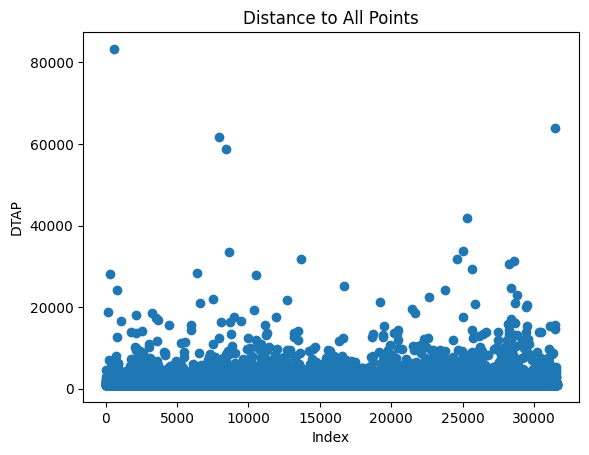

In [23]:
plt.scatter(delays.index, delays['dtap'])
plt.title("Distance to All Points")
plt.xlabel("Index")
plt.ylabel("DTAP")
plt.show()

In [33]:
delays.loc[delays['dtap'].nlargest(10).index.to_list()]

,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,Cluster,ARR_DELAY,DEP_DELAY,ARR_DELAY_scaled,DEP_DELAY_scaled,dtap,dtnn
584,10397,10257,Weekday 16:00 - 20:00,1241.000000,1197.000000,1.000000,1.000000,83291.669545,0.634485
31458,15624,10676,Weekend 16:00 - 20:00,936.000000,937.000000,0.529684,0.574120,63929.877941,0.075641
7938,11292,11540,Weekday 16:00 - 20:00,904.000000,902.000000,0.480339,0.516790,61619.138553,0.075641
8451,11292,14771,Weekday 0:00 - 4:00,877.000000,847.000000,0.438705,0.426699,58752.513342,0.099245
25289,14122,14771,Weekday 4:00 - 8:00,612.000000,618.000000,0.030069,0.051597,41822.693394,0.264403
25011,14112,13367,Weekend 12:00 - 16:00,495.000000,500.000000,-0.150347,-0.141687,33738.157238,0.011028
8646,11298,10685,Weekday 8:00 - 12:00,496.000000,493.333333,-0.148805,-0.152607,33528.550067,0.011028
24589,14107,13264,Weekday 12:00 - 16:00,464.333333,475.333333,-0.197636,-0.182091,31848.355559,0.017050
13667,12264,14747,Weekday 12:00 - 16:00,481.000000,459.000000,-0.171935,-0.208845,31804.929032,0.029445
28597,14771,14698,Weekday 4:00 - 8:00,463.000000,465.000000,-0.199692,-0.199017,31428.197259,0.017050


In [25]:
np.fill_diagonal(distances, np.inf)
delays['dtnn'] = np.min(distances, axis=1)

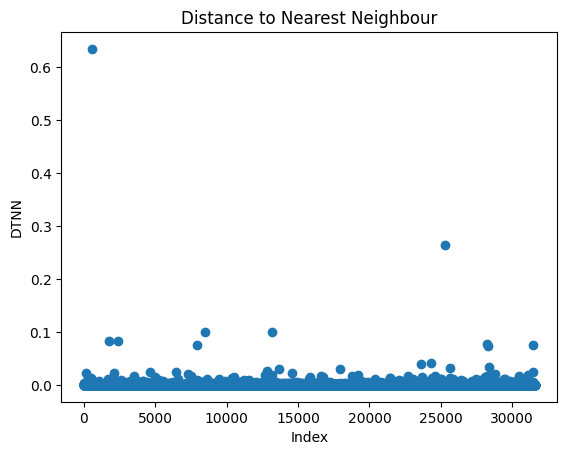

In [26]:
plt.scatter(delays.index, delays['dtnn'])
plt.title("Distance to Nearest Neighbour")
plt.xlabel("Index")
plt.ylabel("DTNN")
plt.show()

In [34]:
delays.loc[delays['dtnn'].nlargest(10).index.to_list()]

,DEST_AIRPORT_ID,ORIGIN_AIRPORT_ID,Cluster,ARR_DELAY,DEP_DELAY,ARR_DELAY_scaled,DEP_DELAY_scaled,dtap,dtnn
584,10397,10257,Weekday 16:00 - 20:00,1241.000000,1197.00,1.000000,1.000000,83291.669545,0.634485
25289,14122,14771,Weekday 4:00 - 8:00,612.000000,618.00,0.030069,0.051597,41822.693394,0.264403
13202,12197,13204,Weekend 16:00 - 20:00,256.000000,91.25,-0.518890,-0.811220,12612.628367,0.099928
8451,11292,14771,Weekday 0:00 - 4:00,877.000000,847.00,0.438705,0.426699,58752.513342,0.099245
1747,10423,10721,Weekday 16:00 - 20:00,-44.000000,143.50,-0.981496,-0.725635,7243.749757,0.083674
2397,10577,11433,Weekday 16:00 - 20:00,-19.333333,189.00,-0.943459,-0.651106,9174.590932,0.083674
28210,14771,10849,Weekday 12:00 - 16:00,489.000000,413.00,-0.159599,-0.284193,30501.844627,0.076351
7938,11292,11540,Weekday 16:00 - 20:00,904.000000,902.00,0.480339,0.516790,61619.138553,0.075641
31458,15624,10676,Weekend 16:00 - 20:00,936.000000,937.00,0.529684,0.574120,63929.877941,0.075641
28330,14771,12264,Weekday 16:00 - 20:00,194.000000,109.00,-0.614495,-0.782146,10297.320615,0.073691
